# Install Requirement

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
pip install googletrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Get the country code

In [24]:
# Import
import googletrends as googletrends

# Get country names
geo_names = googletrends.get_geo_names()
print(geo_names)

#     code               country
# 0     AD               andorra
# 1     AE               united arab emirates
# 2     AF               afghanistan
# 3     AR               argentina
# 4     AO               angola
# ..    ...                ...
# 251    YE               yemen
# 252    YT               mayotte
# 253    ZA               south africa
# 254    ZM               zambia
# 255    ZW               zimbabwe

    code               country
0     AD               andorra
1     AE  united arab emirates
2     AF           afghanistan
3     AR             argentina
4     AO                angola
..   ...                   ...
251   YE                 yemen
252   YT               mayotte
253   ZA          south africa
254   ZM                zambia
255   ZW              zimbabwe

[256 rows x 2 columns]


# Search keywords using GoogleTrend API and plot the results figure

/usr/local/lib/python3.7/dist-packages/worldmap/utils/stringPreprocessing.py:269: FutureWarning: The default value of regex will change from True to False in a future version.
  data.data = data.data.str.replace('\d+','')


[googletrends] Collecting trends over time for geographically: ['Taiwan']
[googletrends] 01 January 2022 - 31 May 2022


100%|██████████| 1/1 [00:00<00:00, 24.49it/s]

[googletrends] [TW] Working on TSMC..


[googletrends] [TW] Working on ASML..
[googletrends] [TW] Working on SUMCO..
[googletrends] [TW] Working on Applied Materials..


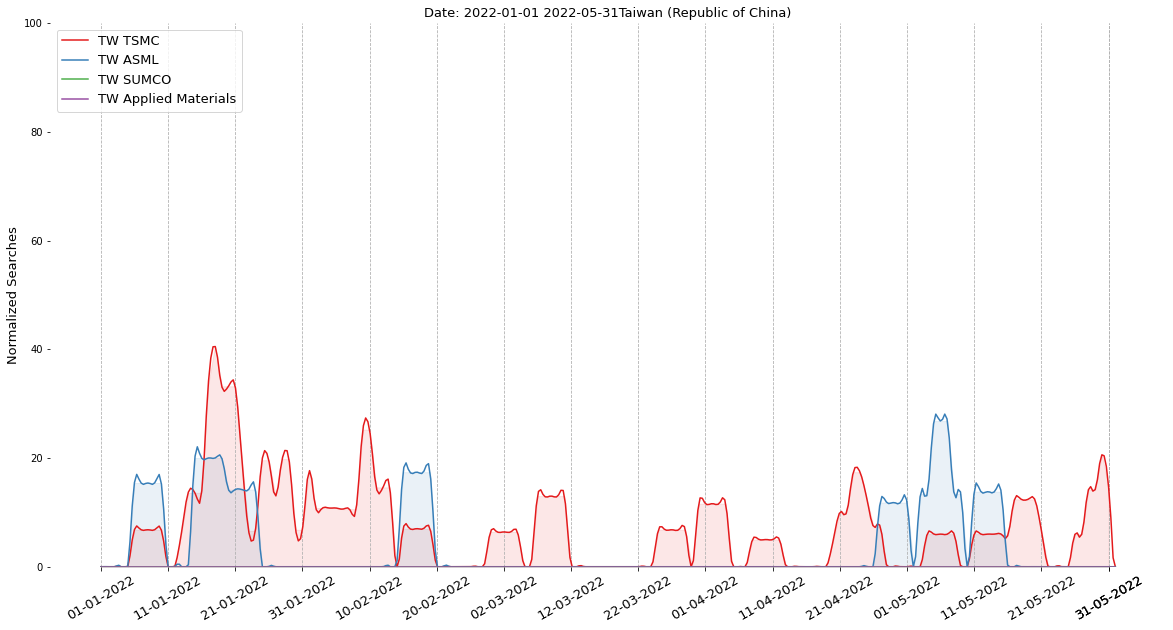

In [25]:
# Import
import googletrends as googletrends

# Settings
searchwords = ['TSMC', 'ASML', 'SUMCO', 'Applied Materials']
geo =['Taiwan']
date_start = '01-01-2022'
date_stop = '31-05-2022'

# Collect the google trends since 2022
results = googletrends.temporal(searchwords, geo=geo, date_start=date_start, date_stop=date_stop)

# [googletrends] Collecting trends over time for geographically: ['Taiwan']
# [googletrends] 01 January 2021 - 31 May 2022
# [googletrends] [TW] Working on TSMC..
# [googletrends] [TW] Working on ASML..
# [googletrends] [TW] Working on SUMCO..
# [googletrends] [TW] Working on Applied Materials..

# Plot
googletrends.plot(results)

# Get our searching result and collect the database data as dictionary

In [26]:
import sqlite3
import numpy as np 
from matplotlib import pyplot as plt 

conn = sqlite3.connect("/content/drive/MyDrive/雲原生/WordCount.db")
cursor = conn.execute("SELECT * FROM WordCountTable;")
db_TSMC = {} # use Dict to collect 'TSMC' in db data
db_ASML = {} # use Dict to collect 'ASML' in db data
db_SUMCO = {} # use Dict to collect 'SUMCO' in db data
db_Applied_Materials = {} # use Dict to collect 'Applied_Materials' in db data

for row in sorted(list(cursor)): #sort the db data by timestamp
  if('TSMC' in row): # collect 'TSMC' data
    if('2022' in row[0]): # collect the data in 2022
      db_TSMC[row[0]]=row[2] # row0 means the timestamp, row2 means number of searching keywords
  if('ASML' in row): # collect 'ASML' data
    if('2022' in row[0]): # collect the data in 2022
      db_ASML[row[0]]=row[2] # row0 means the timestamp, row2 means number of searching keywords
  if('SUMCO' in row): # collect 'SUMCO' data
    if('2022' in row[0]): # collect the data in 2022
      db_SUMCO[row[0]]=row[2] # row0 means the timestamp, row2 means number of searching keywords
  if('Applied Materials' in row): # collect 'Applied Materials' data
    if('2022' in row[0]): # collect the data in 2022
      db_Applied_Materials[row[0]]=row[2] # row0 means the timestamp, row2 means number of searching keywords

print('TSMC:',db_TSMC)
print('ASML:',db_ASML)
print('SUMCO:',db_SUMCO)
print('Applied Materials:',db_Applied_Materials)
  
conn.commit()
conn.close()

TSMC: {'2022-01-01': 18, '2022-01-02': 23, '2022-01-03': 62, '2022-01-04': 42, '2022-01-05': 55, '2022-01-06': 36, '2022-01-07': 11, '2022-01-08': 9, '2022-01-09': 14, '2022-01-10': 52, '2022-01-11': 112, '2022-01-12': 47, '2022-01-13': 119, '2022-01-14': 109, '2022-01-15': 50, '2022-01-16': 13, '2022-01-17': 68, '2022-01-18': 157, '2022-01-19': 60, '2022-01-20': 81, '2022-01-21': 24, '2022-01-22': 52, '2022-01-23': 35, '2022-01-24': 49, '2022-01-25': 100, '2022-01-26': 61, '2022-01-27': 31, '2022-01-28': 35, '2022-01-29': 10, '2022-01-30': 16, '2022-01-31': 105, '2022-02-01': 71, '2022-02-02': 14, '2022-02-03': 22, '2022-02-04': 19, '2022-02-05': 6, '2022-02-06': 7, '2022-02-07': 44, '2022-02-08': 52, '2022-02-09': 39, '2022-02-10': 68, '2022-02-11': 57, '2022-02-12': 5, '2022-02-13': 18, '2022-02-14': 2, '2022-02-15': 78, '2022-02-16': 57, '2022-02-17': 62, '2022-02-18': 39, '2022-02-19': 31, '2022-02-20': 6, '2022-02-21': 80, '2022-02-22': 87, '2022-02-23': 74, '2022-02-24': 142, '2

# Check whether the GoogleTrend result is None or not and transfer the data to list to plot figure

In [27]:
Timestamp_x = results['df'].get("TW").get('date') # Get Timestamp data
GoogleTrend_TSMC_y = results['df'].get("TW").get('TSMC') # Collect serching number of keyword 'TSMC'
if(GoogleTrend_TSMC_y is None): # Avoid None type error while plot the figure because of the GoogleTrend function
  GoogleTrend_TSMC_y = []
  for i in range(len(Timestamp_x)):
    GoogleTrend_TSMC_y.append(0)
Our_TSMC_y = list(db_TSMC.values()) # Get the serching number of keyword 'TSMC' of our function

GoogleTrend_ASML_y = results['df'].get("TW").get('ASML') # Collect serching number of keyword 'ASML'
if(GoogleTrend_ASML_y is None): # Avoid None type error while plot the figure because of the GoogleTrend function
  GoogleTrend_ASML_y = []
  for i in range(len(Timestamp_x)):
    GoogleTrend_ASML_y.append(0)
Our_ASML_y = list(db_ASML.values()) # Get the serching number of keyword 'ASML' of our function

GoogleTrend_SUMCO_y = results['df'].get("TW").get('SUMCO') # Collect serching number of keyword 'SUMCO'
if(GoogleTrend_SUMCO_y is None): # Avoid None type error while plot the figure because of the GoogleTrend function
  GoogleTrend_SUMCO_y = []
  for i in range(len(Timestamp_x)):
    GoogleTrend_SUMCO_y.append(0)
Our_SUMCO_y = list(db_SUMCO.values()) # Get the serching number of keyword 'SUMCO' of our function

GoogleTrend_Applied_Materials_y = results['df'].get("TW").get('Applied Materials') # Collect serching number of keyword 'Applied Materials'
if(GoogleTrend_Applied_Materials_y is None): # Avoid None type error while plot the figure because of the GoogleTrend function
  GoogleTrend_Applied_Materials_y = []
  for i in range(len(Timestamp_x)):
    GoogleTrend_Applied_Materials_y.append(0)
Our_Applied_Materials_y = list(db_Applied_Materials.values()) # Get the serching number of keyword 'Applied Materials' of our function

# Plot the figures about the searching results

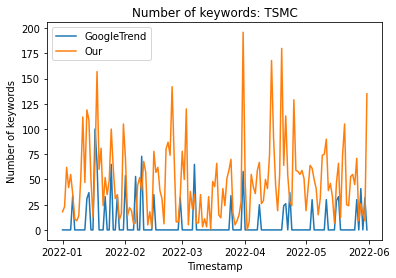

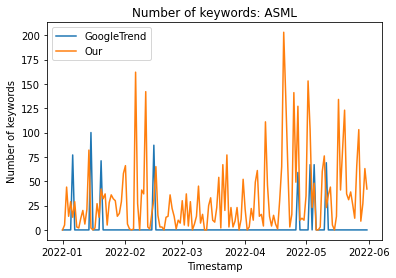

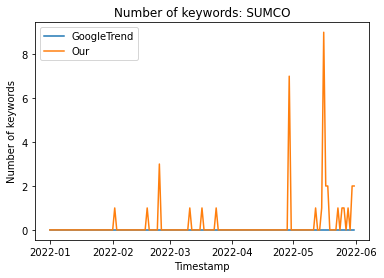

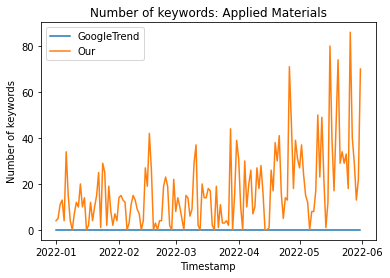

In [28]:
plt.title("Number of keywords: TSMC") 
plt.xlabel("Timestamp") 
plt.ylabel("Number of keywords") 
plt.plot(Timestamp_x, GoogleTrend_TSMC_y, label='GoogleTrend') 
plt.plot(Timestamp_x, Our_TSMC_y, label='Our') 
plt.legend()
plt.show()

plt.title("Number of keywords: ASML") 
plt.xlabel("Timestamp") 
plt.ylabel("Number of keywords") 
plt.plot(Timestamp_x, GoogleTrend_ASML_y, label='GoogleTrend') 
plt.plot(Timestamp_x, Our_ASML_y, label='Our') 
plt.legend()
plt.show()

plt.title("Number of keywords: SUMCO") 
plt.xlabel("Timestamp") 
plt.ylabel("Number of keywords") 
plt.plot(Timestamp_x, GoogleTrend_SUMCO_y, label='GoogleTrend') 
plt.plot(Timestamp_x, Our_SUMCO_y, label='Our') 
plt.legend()
plt.show()

plt.title("Number of keywords: Applied Materials") 
plt.xlabel("Timestamp") 
plt.ylabel("Number of keywords") 
plt.plot(Timestamp_x, GoogleTrend_Applied_Materials_y, label='GoogleTrend') 
plt.plot(Timestamp_x, Our_Applied_Materials_y, label='Our') 
plt.legend()
plt.show()